In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [64]:
df = pd.read_csv('Final_invoice.csv')

In [65]:
df.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.000,0.000,MAJIWADA,0.000,0.000,0.000,0.000,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,7005200002.000,500.060,Paid Service,0.000,2348.750,400601,BC01,THANE,NaN,NO,0.000,KA19MA1291,0.000,0.000,0.000,0.000,nan,0.000,RUPESH,4051.950,0.000,0.000,0.000,0.000,4051.950,BC01FS1
1,1,0.000,0.000,THNAE,0.000,0.000,0.000,0.000,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,7005200003.000,0.000,SMC Value Package,0.000,0.000,400603,BC01,THANE,NaN,NO,0.000,MH43R3046,0.000,0.000,0.000,0.000,nan,0.000,PRASHANT,1001.290,0.000,0.000,0.000,0.000,1001.290,BC01SA2
2,2,0.000,0.000,THANE,0.000,0.000,0.000,0.000,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,7005200004.000,0.000,Running Repairs,0.000,52.950,400607,BC01,THANE,NaN,NO,0.000,AP09AX0582,0.000,0.000,0.000,0.000,nan,0.000,IMRAN,233.140,0.000,0.000,0.000,0.000,233.140,BC01SA2
3,3,0.000,0.000,THNAE,0.000,0.000,0.000,0.000,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,7005200005.000,0.000,SMC Redemption,0.000,0.000,400603,BC01,THANE,NaN,NO,0.000,MH43R3046,0.000,0.000,0.000,0.000,nan,0.000,PRASHANT,0.000,0.000,0.000,0.000,0.000,0.000,BC01SA2
4,4,0.000,0.000,THANE,0.000,0.000,0.000,0.000,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,7005200006.000,499.990,Paid Service,0.000,944.160,400603,BC01,THANE,NaN,NO,0.000,MH04CD9768,0.000,0.000,0.000,0.000,nan,0.000,DAYANAND,2747.120,0.000,0.000,0.000,0.000,2747.120,BC01SA2


In [66]:
df.shape

(492314, 59)

In [67]:
df.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [68]:
columns_to_be_removed = df.isnull().sum()[df.isnull().sum().sort_values() > 197285].index

In [69]:
invoice = df.drop(columns=columns_to_be_removed)

In [70]:
invoice.head(5)

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2


In [55]:
import datetime as dt

In [56]:
#Convert the string date field to datetime
invoice['Invoice Date'] = pd.to_datetime(invoice['Invoice Date'])

In [57]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
invoice['InvoiceMonth'] = invoice['Invoice Date'].apply(get_month)
grouping = invoice.groupby('Customer No.')['InvoiceMonth']
invoice['CohortMonth'] = grouping.transform('min')
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,CohortMonth
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-02-01,7005200002,11:30:36,168303,13-12-2014,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-02-01,2014-08-01
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-03-01,7005200003,10:07:32,173997,02-01-2015,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-03-01,2015-03-01
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-03-01,7005200004,11:12:57,173889,02-01-2015,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-03-01,2014-11-01
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-03-01,7005200005,11:40:44,174158,03-01-2015,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-03-01,2015-03-01
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-03-01,7005200006,12:07:17,173860,02-01-2015,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-03-01,2013-01-01


In [58]:
invoice[invoice['Customer No.'] == '67849']

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,CohortMonth
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-02-01,7005200002,11:30:36,168303,13-12-2014,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-02-01,2014-08-01
184701,619842,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2014-08-14,7000137359,17:54:30,136482,08-08-2014,15:26:53,45575,989.980,GENERAL MOTORS,0.000,SPARK,6249.870,Accidental,4230.250,400601,BC01,THANE,NO,0.000,KA19MA1291,11470.100,BC01FS1,2014-08-01,2014-08-01
184829,619970,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2014-08-16,7000137489,10:52:30,135895,06-08-2014,12:49:48,45575,6473.050,GENERAL MOTORS,0.000,SPARK,7325.090,Paid Service,14546.140,400601,BC01,THANE,NO,0.000,KA19MA1291,28344.280,BC01FS1,2014-08-01,2014-08-01
197821,632962,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2014-09-10,7000151113,17:35:30,150383,06-10-2014,11:40:52,47556,0.000,GENERAL MOTORS,0.000,SPARK,0.000,Running Repairs,200.000,400601,BC01,THANE,NO,0.000,KA19MA1291,200.000,BC01SA1,2014-09-01,2014-08-01
220230,655371,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2014-12-31,7000175211,18:41:00,168210,13-12-2014,12:14:37,49317,1760.020,GENERAL MOTORS,500.000,SPARK,7850.090,Accidental,20348.810,400601,BC01,THANE,NO,0.000,KA19MA1291,30458.920,BC01FS1,2014-12-01,2014-08-01


In [59]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [60]:
invoice_year, invoice_month, _ = get_date_int(invoice, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(invoice, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
invoice['CohortIndex'] = years_diff * 12 + months_diff + 1
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,CohortMonth,CohortIndex
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-02-01,7005200002,11:30:36,168303,13-12-2014,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-02-01,2014-08-01,7
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-03-01,7005200003,10:07:32,173997,02-01-2015,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-03-01,2015-03-01,1
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-03-01,7005200004,11:12:57,173889,02-01-2015,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-03-01,2014-11-01,5
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-03-01,7005200005,11:40:44,174158,03-01-2015,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-03-01,2015-03-01,1
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-03-01,7005200006,12:07:17,173860,02-01-2015,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-03-01,2013-01-01,27


In [61]:
grouping = invoice.groupby(['CohortMonth', 'CohortIndex'])
grouping


In [62]:
cohort_data = grouping['Customer No.'].apply(pd.Series.nunique)
cohort_data

CohortMonth  CohortIndex
2012-01-01   1               276
             2                 7
             3                14
             4                33
             5                25
                            ... 
2016-10-01   2               124
             3               144
2016-11-01   1              2138
             2                28
2016-12-01   1              2431
Name: Customer No., Length: 1829, dtype: int64

In [14]:
cohort_data = cohort_data.reset_index()
cohort_data.head(60)

,CohortMonth,CohortIndex,Customer No.
0,2012-01-01,1,276
1,2012-01-01,2,7
2,2012-01-01,3,14
3,2012-01-01,4,33
4,2012-01-01,5,25
5,2012-01-01,6,35
6,2012-01-01,7,32
7,2012-01-01,8,32
8,2012-01-01,9,24
9,2012-01-01,10,40


In [15]:
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Customer No.')

In [16]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,276.000,7.000,14.000,33.000,25.000,35.000,32.000,32.000,24.000,40.000,28.000,34.000,25.000,36.000,32.000,28.000,22.000,28.000,33.000,34.000,17.000,23.000,26.000,24.000,13.000,13.000,13.000,15.000,11.000,22.000,18.000,14.000,18.000,11.000,10.000,14.000,6.000,6.000,11.000,10.000,7.000,6.000,6.000,5.000,7.000,8.000,11.000,5.000,3.000,5.000,6.000,6.000,4.000,1.000,6.000,2.000,6.000,2.000,3.000,2.000
2012-02-01,234.000,13.000,29.000,27.000,26.000,32.000,27.000,27.000,24.000,26.000,37.000,26.000,31.000,23.000,25.000,33.000,27.000,23.000,25.000,21.000,22.000,15.000,21.000,9.000,7.000,7.000,8.000,16.000,9.000,14.000,7.000,6.000,16.000,5.000,8.000,11.000,7.000,2.000,10.000,12.000,3.000,4.000,5.000,4.000,4.000,7.000,5.000,2.000,5.000,nan,6.000,3.000,4.000,1.000,2.000,5.000,1.000,2.000,3.000,nan
2012-03-01,374.000,18.000,39.000,37.000,44.000,41.000,34.000,34.000,49.000,35.000,34.000,37.000,39.000,23.000,33.000,31.000,26.000,30.000,28.000,24.000,25.000,26.000,16.000,16.000,21.000,21.000,15.000,12.000,11.000,13.000,22.000,8.000,18.000,12.000,7.000,5.000,12.000,5.000,15.000,6.000,10.000,5.000,8.000,5.000,3.000,6.000,10.000,9.000,5.000,7.000,4.000,5.000,6.000,1.000,2.000,3.000,1.000,3.000,nan,nan
2012-04-01,1091.000,116.000,105.000,139.000,137.000,104.000,106.000,124.000,112.000,84.000,97.000,90.000,76.000,87.000,83.000,88.000,81.000,67.000,73.000,81.000,73.000,43.000,44.000,41.000,44.000,47.000,39.000,50.000,30.000,47.000,50.000,38.000,36.000,29.000,23.000,20.000,27.000,24.000,19.000,28.000,26.000,30.000,23.000,25.000,23.000,20.000,16.000,15.000,17.000,11.000,9.000,14.000,14.000,11.000,10.000,4.000,6.000,nan,nan,nan
2012-05-01,1095.000,103.000,101.000,105.000,101.000,91.000,102.000,127.000,78.000,70.000,82.000,66.000,72.000,80.000,104.000,60.000,71.000,64.000,71.000,85.000,44.000,41.000,44.000,32.000,47.000,45.000,31.000,52.000,35.000,42.000,48.000,34.000,18.000,20.000,27.000,31.000,31.000,22.000,35.000,26.000,23.000,25.000,18.000,19.000,13.000,16.000,15.000,21.000,19.000,8.000,12.000,12.000,8.000,13.000,7.000,4.000,nan,nan,nan,nan
2012-06-01,1075.000,102.000,86.000,77.000,99.000,94.000,99.000,60.000,90.000,77.000,71.000,64.000,80.000,58.000,80.000,55.000,58.000,67.000,61.000,35.000,22.000,32.000,37.000,42.000,45.000,33.000,27.000,31.000,37.000,30.000,34.000,19.000,16.000,7.000,28.000,22.000,19.000,29.000,22.000,17.000,23.000,14.000,15.000,12.000,9.000,10.000,13.000,10.000,5.000,10.000,10.000,6.000,7.000,7.000,3.000,nan,nan,nan,nan,nan
2012-07-01,1155.000,85.000,63.000,92.000,92.000,90.000,92.000,70.000,69.000,72.000,84.000,78.000,84.000,80.000,63.000,70.000,70.000,77.000,51.000,40.000,41.000,38.000,39.000,51.000,40.000,47.000,51.000,47.000,37.000,42.000,18.000,18.000,29.000,30.000,21.000,24.000,25.000,19.000,27.000,22.000,28.000,25.000,15.000,14.000,12.000,18.000,11.000,8.000,16.000,14.000,20.000,14.000,6.000,5.000,nan,nan,nan,nan,nan,nan
2012-08-01,987.000,70.000,64.000,64.000,87.000,50.000,71.000,56.000,64.000,60.000,61.000,60.000,51.000,57.000,56.000,56.000,55.000,27.000,27.000,39.000,26.000,31.000,43.000,24.000,37.000,25.000,23.000,20.000,34.000,18.000,8.000,16.000,22.000,26.000,13.000,23.000,18.000,17.000,19.000,17.000,18.000,8.000,15.000,10.000,13.000,8.000,8.000,7.000,6.000,8.000,5.000,5.000,3.000,nan,nan,nan,nan,nan,nan,nan
2012-09-01,853.000,61.000,44.000,72.000,50.000,42.000,72.000,44.000,56.000,58.000,58.000,53.000,46.000,45.000,44.000,47.000,30.000,25.000,23.000,25.000,29.000,24.000,29.000,23.000,21.000,31.000,33.000,22.000,9.000,14.000,22.000,21.000,22.000,21.000,11.000,11.000,15.000,22.000,23.000,15.000,19.000,9.000,9.000,18.000,6.000,4.000,8.000,11.000,6.000,11.000,5.000,3.000,nan,nan,nan,nan,nan,nan,nan,nan


In [17]:
cohort_sizes = cohort_counts.iloc[:,0]

In [18]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [19]:
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,100.000,2.500,5.100,12.000,9.100,12.700,11.600,11.600,8.700,14.500,10.100,12.300,9.100,13.000,11.600,10.100,8.000,10.100,12.000,12.300,6.200,8.300,9.400,8.700,4.700,4.700,4.700,5.400,4.000,8.000,6.500,5.100,6.500,4.000,3.600,5.100,2.200,2.200,4.000,3.600,2.500,2.200,2.200,1.800,2.500,2.900,4.000,1.800,1.100,1.800,2.200,2.200,1.400,0.400,2.200,0.700,2.200,0.700,1.100,0.700
2012-02-01,100.000,5.600,12.400,11.500,11.100,13.700,11.500,11.500,10.300,11.100,15.800,11.100,13.200,9.800,10.700,14.100,11.500,9.800,10.700,9.000,9.400,6.400,9.000,3.800,3.000,3.000,3.400,6.800,3.800,6.000,3.000,2.600,6.800,2.100,3.400,4.700,3.000,0.900,4.300,5.100,1.300,1.700,2.100,1.700,1.700,3.000,2.100,0.900,2.100,nan,2.600,1.300,1.700,0.400,0.900,2.100,0.400,0.900,1.300,nan
2012-03-01,100.000,4.800,10.400,9.900,11.800,11.000,9.100,9.100,13.100,9.400,9.100,9.900,10.400,6.100,8.800,8.300,7.000,8.000,7.500,6.400,6.700,7.000,4.300,4.300,5.600,5.600,4.000,3.200,2.900,3.500,5.900,2.100,4.800,3.200,1.900,1.300,3.200,1.300,4.000,1.600,2.700,1.300,2.100,1.300,0.800,1.600,2.700,2.400,1.300,1.900,1.100,1.300,1.600,0.300,0.500,0.800,0.300,0.800,nan,nan
2012-04-01,100.000,10.600,9.600,12.700,12.600,9.500,9.700,11.400,10.300,7.700,8.900,8.200,7.000,8.000,7.600,8.100,7.400,6.100,6.700,7.400,6.700,3.900,4.000,3.800,4.000,4.300,3.600,4.600,2.700,4.300,4.600,3.500,3.300,2.700,2.100,1.800,2.500,2.200,1.700,2.600,2.400,2.700,2.100,2.300,2.100,1.800,1.500,1.400,1.600,1.000,0.800,1.300,1.300,1.000,0.900,0.400,0.500,nan,nan,nan
2012-05-01,100.000,9.400,9.200,9.600,9.200,8.300,9.300,11.600,7.100,6.400,7.500,6.000,6.600,7.300,9.500,5.500,6.500,5.800,6.500,7.800,4.000,3.700,4.000,2.900,4.300,4.100,2.800,4.700,3.200,3.800,4.400,3.100,1.600,1.800,2.500,2.800,2.800,2.000,3.200,2.400,2.100,2.300,1.600,1.700,1.200,1.500,1.400,1.900,1.700,0.700,1.100,1.100,0.700,1.200,0.600,0.400,nan,nan,nan,nan
2012-06-01,100.000,9.500,8.000,7.200,9.200,8.700,9.200,5.600,8.400,7.200,6.600,6.000,7.400,5.400,7.400,5.100,5.400,6.200,5.700,3.300,2.000,3.000,3.400,3.900,4.200,3.100,2.500,2.900,3.400,2.800,3.200,1.800,1.500,0.700,2.600,2.000,1.800,2.700,2.000,1.600,2.100,1.300,1.400,1.100,0.800,0.900,1.200,0.900,0.500,0.900,0.900,0.600,0.700,0.700,0.300,nan,nan,nan,nan,nan
2012-07-01,100.000,7.400,5.500,8.000,8.000,7.800,8.000,6.100,6.000,6.200,7.300,6.800,7.300,6.900,5.500,6.100,6.100,6.700,4.400,3.500,3.500,3.300,3.400,4.400,3.500,4.100,4.400,4.100,3.200,3.600,1.600,1.600,2.500,2.600,1.800,2.100,2.200,1.600,2.300,1.900,2.400,2.200,1.300,1.200,1.000,1.600,1.000,0.700,1.400,1.200,1.700,1.200,0.500,0.400,nan,nan,nan,nan,nan,nan
2012-08-01,100.000,7.100,6.500,6.500,8.800,5.100,7.200,5.700,6.500,6.100,6.200,6.100,5.200,5.800,5.700,5.700,5.600,2.700,2.700,4.000,2.600,3.100,4.400,2.400,3.700,2.500,2.300,2.000,3.400,1.800,0.800,1.600,2.200,2.600,1.300,2.300,1.800,1.700,1.900,1.700,1.800,0.800,1.500,1.000,1.300,0.800,0.800,0.700,0.600,0.800,0.500,0.500,0.300,nan,nan,nan,nan,nan,nan,nan
2012-09-01,100.000,7.200,5.200,8.400,5.900,4.900,8.400,5.200,6.600,6.800,6.800,6.200,5.400,5.300,5.200,5.500,3.500,2.900,2.700,2.900,3.400,2.800,3.400,2.700,2.500,3.600,3.900,2.600,1.100,1.600,2.600,2.500,2.600,2.500,1.300,1.300,1.800,2.600,2.700,1.800,2.200,1.100,1.100,2.100,0.700,0.500,0.900,1.300,0.700,1.300,0.600,0.400,nan,nan,nan,nan,nan,nan,nan,nan


In [20]:
churn = 1 - retention

In [21]:
churn.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.000,97.500,94.900,88.000,90.900,87.300,88.400,88.400,91.300,85.500,89.900,87.700,90.900,87.000,88.400,89.900,92.000,89.900,88.000,87.700,93.800,91.700,90.600,91.300,95.300,95.300,95.300,94.600,96.000,92.000,93.500,94.900,93.500,96.000,96.400,94.900,97.800,97.800,96.000,96.400,97.500,97.800,97.800,98.200,97.500,97.100,96.000,98.200,98.900,98.200,97.800,97.800,98.600,99.600,97.800,99.300,97.800,99.300,98.900,99.300
2012-02-01,0.000,94.400,87.600,88.500,88.900,86.300,88.500,88.500,89.700,88.900,84.200,88.900,86.800,90.200,89.300,85.900,88.500,90.200,89.300,91.000,90.600,93.600,91.000,96.200,97.000,97.000,96.600,93.200,96.200,94.000,97.000,97.400,93.200,97.900,96.600,95.300,97.000,99.100,95.700,94.900,98.700,98.300,97.900,98.300,98.300,97.000,97.900,99.100,97.900,nan,97.400,98.700,98.300,99.600,99.100,97.900,99.600,99.100,98.700,nan
2012-03-01,0.000,95.200,89.600,90.100,88.200,89.000,90.900,90.900,86.900,90.600,90.900,90.100,89.600,93.900,91.200,91.700,93.000,92.000,92.500,93.600,93.300,93.000,95.700,95.700,94.400,94.400,96.000,96.800,97.100,96.500,94.100,97.900,95.200,96.800,98.100,98.700,96.800,98.700,96.000,98.400,97.300,98.700,97.900,98.700,99.200,98.400,97.300,97.600,98.700,98.100,98.900,98.700,98.400,99.700,99.500,99.200,99.700,99.200,nan,nan
2012-04-01,0.000,89.400,90.400,87.300,87.400,90.500,90.300,88.600,89.700,92.300,91.100,91.800,93.000,92.000,92.400,91.900,92.600,93.900,93.300,92.600,93.300,96.100,96.000,96.200,96.000,95.700,96.400,95.400,97.300,95.700,95.400,96.500,96.700,97.300,97.900,98.200,97.500,97.800,98.300,97.400,97.600,97.300,97.900,97.700,97.900,98.200,98.500,98.600,98.400,99.000,99.200,98.700,98.700,99.000,99.100,99.600,99.500,nan,nan,nan
2012-05-01,0.000,90.600,90.800,90.400,90.800,91.700,90.700,88.400,92.900,93.600,92.500,94.000,93.400,92.700,90.500,94.500,93.500,94.200,93.500,92.200,96.000,96.300,96.000,97.100,95.700,95.900,97.200,95.300,96.800,96.200,95.600,96.900,98.400,98.200,97.500,97.200,97.200,98.000,96.800,97.600,97.900,97.700,98.400,98.300,98.800,98.500,98.600,98.100,98.300,99.300,98.900,98.900,99.300,98.800,99.400,99.600,nan,nan,nan,nan
2012-06-01,0.000,90.500,92.000,92.800,90.800,91.300,90.800,94.400,91.600,92.800,93.400,94.000,92.600,94.600,92.600,94.900,94.600,93.800,94.300,96.700,98.000,97.000,96.600,96.100,95.800,96.900,97.500,97.100,96.600,97.200,96.800,98.200,98.500,99.300,97.400,98.000,98.200,97.300,98.000,98.400,97.900,98.700,98.600,98.900,99.200,99.100,98.800,99.100,99.500,99.100,99.100,99.400,99.300,99.300,99.700,nan,nan,nan,nan,nan
2012-07-01,0.000,92.600,94.500,92.000,92.000,92.200,92.000,93.900,94.000,93.800,92.700,93.200,92.700,93.100,94.500,93.900,93.900,93.300,95.600,96.500,96.500,96.700,96.600,95.600,96.500,95.900,95.600,95.900,96.800,96.400,98.400,98.400,97.500,97.400,98.200,97.900,97.800,98.400,97.700,98.100,97.600,97.800,98.700,98.800,99.000,98.400,99.000,99.300,98.600,98.800,98.300,98.800,99.500,99.600,nan,nan,nan,nan,nan,nan
2012-08-01,0.000,92.900,93.500,93.500,91.200,94.900,92.800,94.300,93.500,93.900,93.800,93.900,94.800,94.200,94.300,94.300,94.400,97.300,97.300,96.000,97.400,96.900,95.600,97.600,96.300,97.500,97.700,98.000,96.600,98.200,99.200,98.400,97.800,97.400,98.700,97.700,98.200,98.300,98.100,98.300,98.200,99.200,98.500,99.000,98.700,99.200,99.200,99.300,99.400,99.200,99.500,99.500,99.700,nan,nan,nan,nan,nan,nan,nan
2012-09-01,0.000,92.800,94.800,91.600,94.100,95.100,91.600,94.800,93.400,93.200,93.200,93.800,94.600,94.700,94.800,94.500,96.500,97.100,97.300,97.100,96.600,97.200,96.600,97.300,97.500,96.400,96.100,97.400,98.900,98.400,97.400,97.500,97.400,97.500,98.700,98.700,98.200,97.400,97.300,98.200,97.800,98.900,98.900,97.900,99.300,99.500,99.100,98.700,99.300,98.700,99.400,99.600,nan,nan,nan,nan,na

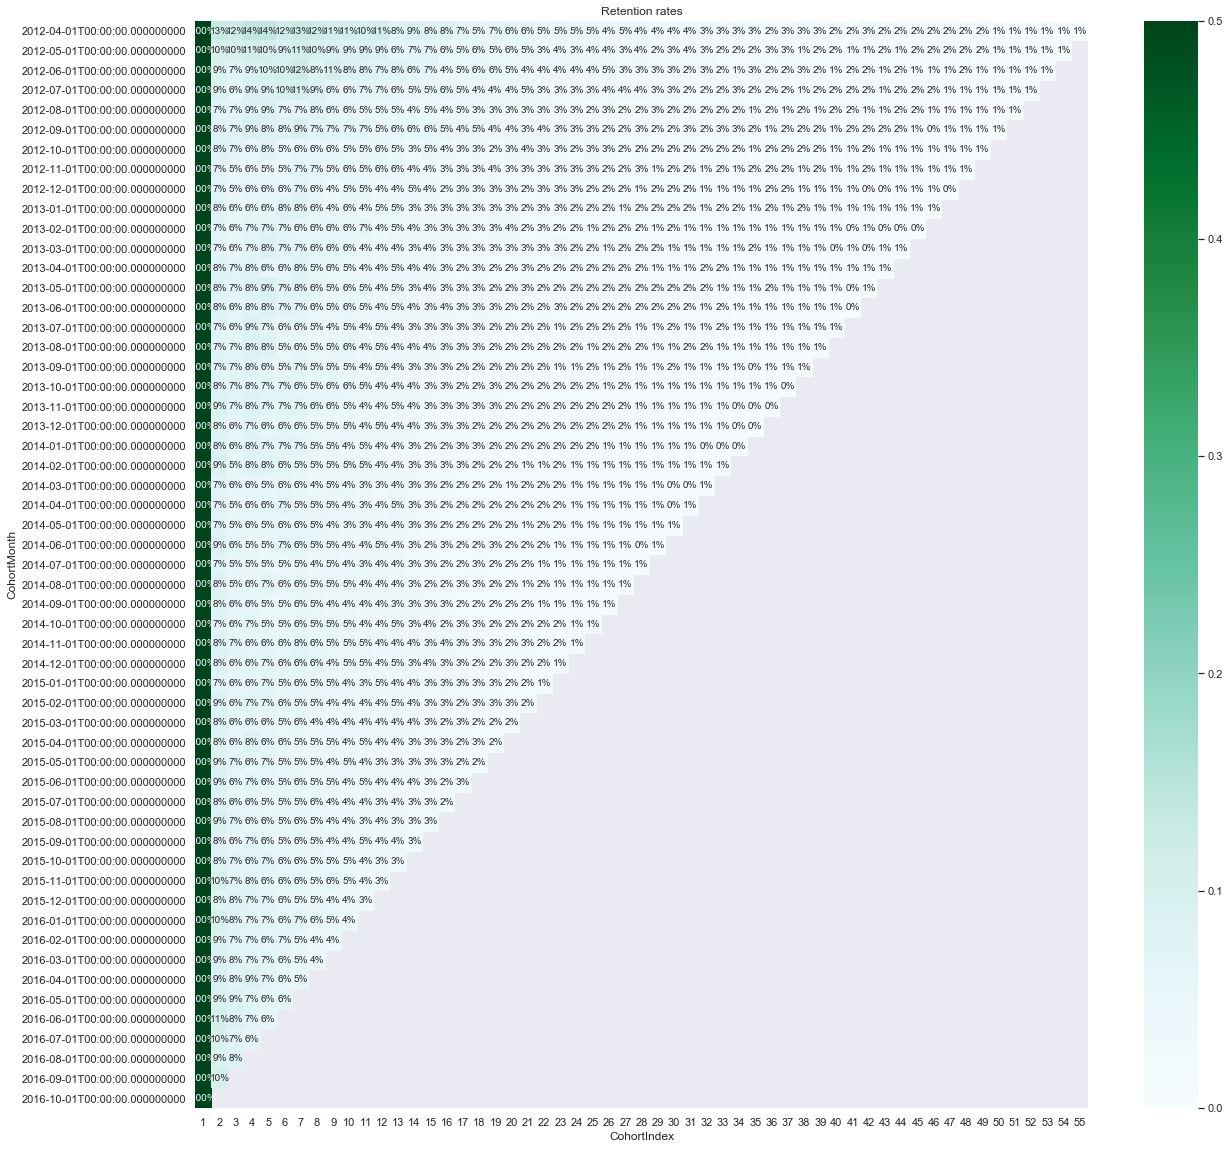

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.title('Retention rates')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()

In [32]:
grouping = invoice.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Total Amt Wtd Tax.'].sum()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',
columns='CohortIndex',
values='Total Amt Wtd Tax.')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-01,8076962.200,2560510.400,2214586.300,2330859.900,1792072.700,1960648.100,1891408.200,2060752.100,1384949.700,1259922.500,985383.000,819133.400,423376.900,745805.700,826642.400,748218.400,624242.600,588625.400,548152.100,398900.200,495714.200,558236.500,442238.100,552016.900,576305.800,333835.200,432943.100,623072.400,460863.300,359851.400,417448.000,620612.600,213954.400,354451.700,456905.800,180332.000,526932.100,342970.200,881007.600,377497.500,604392.300,736665.400,278301.100,540354.500,448270.500,398776.500,545323.000,421136.100,336892.300,483076.900,428759.900,174019.500,501961.500,163661.400,128110.700
2012-05-01,6161656.500,618953.200,790149.500,720954.100,757159.200,698889.700,615169.000,778394.600,758452.300,641180.000,573882.000,652114.900,349461.300,507980.800,387218.600,408576.800,314000.000,517336.800,250951.500,420292.600,327653.800,261892.400,291993.200,130940.600,414538.400,173284.200,226513.000,385487.000,188428.200,224868.300,191880.700,154437.700,146018.700,110650.300,176009.400,198012.300,209374.000,188884.100,136260.800,82989.300,79996.500,83971.400,92558.000,89858.100,117753.000,67816.300,78485.000,223386.800,347378.100,104322.100,28790.800,53442.400,105349.100,50242.800,nan
2012-06-01,6763790.200,653978.100,618661.700,528092.700,533580.300,770845.400,612917.600,479271.300,586590.300,385335.100,463020.900,521344.500,855649.200,293120.100,410949.600,260798.600,382909.200,482028.400,462616.400,272928.300,193137.200,141969.800,188384.400,228942.100,290821.800,382654.600,221316.300,177995.000,287385.000,210090.600,399186.400,276533.400,197120.600,36469.500,173531.900,121623.400,135590.900,214417.900,167786.300,58088.500,65869.400,141084.400,43805.800,127445.900,54750.900,160096.000,111442.400,181238.900,45386.100,86489.600,71979.000,23368.100,37051.600,nan,nan
2012-07-01,6484766.600,979493.100,441643.200,630538.200,791121.300,746218.500,720020.400,594386.600,447755.500,525801.200,403509.500,354883.100,327034.600,298031.700,267177.200,437335.700,309180.000,443062.900,201420.100,278926.500,373850.500,283319.700,170711.900,183034.600,218483.800,195426.200,223930.700,248405.500,233988.400,229739.600,107412.500,158497.900,96866.900,147605.600,118575.500,129002.400,247892.600,135801.800,65457.100,62144.200,97996.500,86245.400,38301.300,192320.500,106720.000,121060.300,165227.400,28772.400,100113.400,59719.700,29787.800,26936.400,nan,nan,nan
2012-08-01,4806792.100,349214.200,218935.300,371641.600,392156.700,295842.900,318252.900,403123.600,185485.600,240346.400,240674.000,214766.300,257576.500,195267.800,222254.500,153757.300,250115.600,211086.100,116130.800,217424.400,103873.300,223409.000,104212.400,99647.200,105813.900,322155.400,66929.000,61545.100,135981.600,166743.500,91508.100,275517.500,100516.900,73748.800,24841.700,130335.200,26489.400,103071.200,66101.400,52858.600,76055.400,84736.000,51996.800,49095.500,62740.200,22894.200,44043.400,82459.400,81992.600,11592.000,75963.500,nan,nan,nan,nan
2012-09-01,4845296.300,464579.000,259074.700,401725.000,207049.800,424903.800,362037.400,276810.600,260517.200,415101.000,305119.500,232001.000,323751.900,190349.000,240606.300,315759.700,237378.600,208112.100,298123.700,200486.200,165518.400,143944.200,168529.400,89165.000,149971.600,60787.400,106946.100,151777.500,103860.900,81008.800,95149.400,146980.500,224461.600,83844.900,61033.000,56740.600,165989.100,117173.600,115386.300,31895.400,90235.800,48802.300,69650.800,89493.200,20472.500,1392.800,44740.100,21014.300,70936.700,47360.200,nan,nan,nan,nan,nan
2012-10-01,5450668.700,393875.200,361944.400,267987.700,249071.900,187955.300,338690.400,258797.300,297961.200,137989.200,255165.800,351345.800,174691.100,191054.900,231716.500,324883.000,125069.800,208669.000,175986.700,302222.

In [33]:
cohort_sizes = average_quantity.iloc[:,0]
revenue = average_quantity.divide(cohort_sizes, axis=0)
revenue.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-01,100.000,31.700,27.400,28.900,22.200,24.300,23.400,25.500,17.100,15.600,12.200,10.100,5.200,9.200,10.200,9.300,7.700,7.300,6.800,4.900,6.100,6.900,5.500,6.800,7.100,4.100,5.400,7.700,5.700,4.500,5.200,7.700,2.600,4.400,5.700,2.200,6.500,4.200,10.900,4.700,7.500,9.100,3.400,6.700,5.500,4.900,6.800,5.200,4.200,6.000,5.300,2.200,6.200,2.000,1.600
2012-05-01,100.000,10.000,12.800,11.700,12.300,11.300,10.000,12.600,12.300,10.400,9.300,10.600,5.700,8.200,6.300,6.600,5.100,8.400,4.100,6.800,5.300,4.300,4.700,2.100,6.700,2.800,3.700,6.300,3.100,3.600,3.100,2.500,2.400,1.800,2.900,3.200,3.400,3.100,2.200,1.300,1.300,1.400,1.500,1.500,1.900,1.100,1.300,3.600,5.600,1.700,0.500,0.900,1.700,0.800,nan
2012-06-01,100.000,9.700,9.100,7.800,7.900,11.400,9.100,7.100,8.700,5.700,6.800,7.700,12.700,4.300,6.100,3.900,5.700,7.100,6.800,4.000,2.900,2.100,2.800,3.400,4.300,5.700,3.300,2.600,4.200,3.100,5.900,4.100,2.900,0.500,2.600,1.800,2.000,3.200,2.500,0.900,1.000,2.100,0.600,1.900,0.800,2.400,1.600,2.700,0.700,1.300,1.100,0.300,0.500,nan,nan
2012-07-01,100.000,15.100,6.800,9.700,12.200,11.500,11.100,9.200,6.900,8.100,6.200,5.500,5.000,4.600,4.100,6.700,4.800,6.800,3.100,4.300,5.800,4.400,2.600,2.800,3.400,3.000,3.500,3.800,3.600,3.500,1.700,2.400,1.500,2.300,1.800,2.000,3.800,2.100,1.000,1.000,1.500,1.300,0.600,3.000,1.600,1.900,2.500,0.400,1.500,0.900,0.500,0.400,nan,nan,nan
2012-08-01,100.000,7.300,4.600,7.700,8.200,6.200,6.600,8.400,3.900,5.000,5.000,4.500,5.400,4.100,4.600,3.200,5.200,4.400,2.400,4.500,2.200,4.600,2.200,2.100,2.200,6.700,1.400,1.300,2.800,3.500,1.900,5.700,2.100,1.500,0.500,2.700,0.600,2.100,1.400,1.100,1.600,1.800,1.100,1.000,1.300,0.500,0.900,1.700,1.700,0.200,1.600,nan,nan,nan,nan
2012-09-01,100.000,9.600,5.300,8.300,4.300,8.800,7.500,5.700,5.400,8.600,6.300,4.800,6.700,3.900,5.000,6.500,4.900,4.300,6.200,4.100,3.400,3.000,3.500,1.800,3.100,1.300,2.200,3.100,2.100,1.700,2.000,3.000,4.600,1.700,1.300,1.200,3.400,2.400,2.400,0.700,1.900,1.000,1.400,1.800,0.400,0.000,0.900,0.400,1.500,1.000,nan,nan,nan,nan,nan
2012-10-01,100.000,7.200,6.600,4.900,4.600,3.400,6.200,4.700,5.500,2.500,4.700,6.400,3.200,3.500,4.300,6.000,2.300,3.800,3.200,5.500,4.000,3.400,3.200,1.400,2.000,2.500,1.600,7.700,1.300,1.500,3.200,3.200,2.800,1.200,0.900,2.000,1.500,2.400,1.600,1.200,1.200,1.300,1.100,0.400,0.300,0.700,1.400,0.100,0.700,nan,nan,nan,nan,nan,nan
2012-11-01,100.000,6.100,8.000,7.200,4.600,5.300,7.600,7.600,4.900,6.200,4.900,6.400,6.700,3.800,2.400,2.900,3.500,4.100,3.900,2.500,2.900,4.200,3.500,3.900,3.200,2.600,2.400,2.100,1.500,2.400,2.700,1.300,2.800,1.600,2.200,2.000,0.900,2.000,1.700,2.300,1.200,1.300,0.900,0.800,0.700,0.700,0.900,0.600,nan,nan,nan,nan,nan,nan,nan
2012-12-01,100.000,7.200,4.600,7.400,3.900,4.300,6.000,4.800,3.000,7.800,5.800,3.300,4.500,5.000,4.000,3.700,3.900,2.700,3.300,3.400,3.200,3.200,3.000,2.500,2.900,1.800,1.600,1.900,2.900,2.700,3.600,2.000,1.700,0.800,1.400,1.200,1.300,0.800,2.000,1.700,0.500,0.200,0.400,1.000,1.100,0.300,0.200,nan,nan,nan,nan,nan,nan,nan,nan


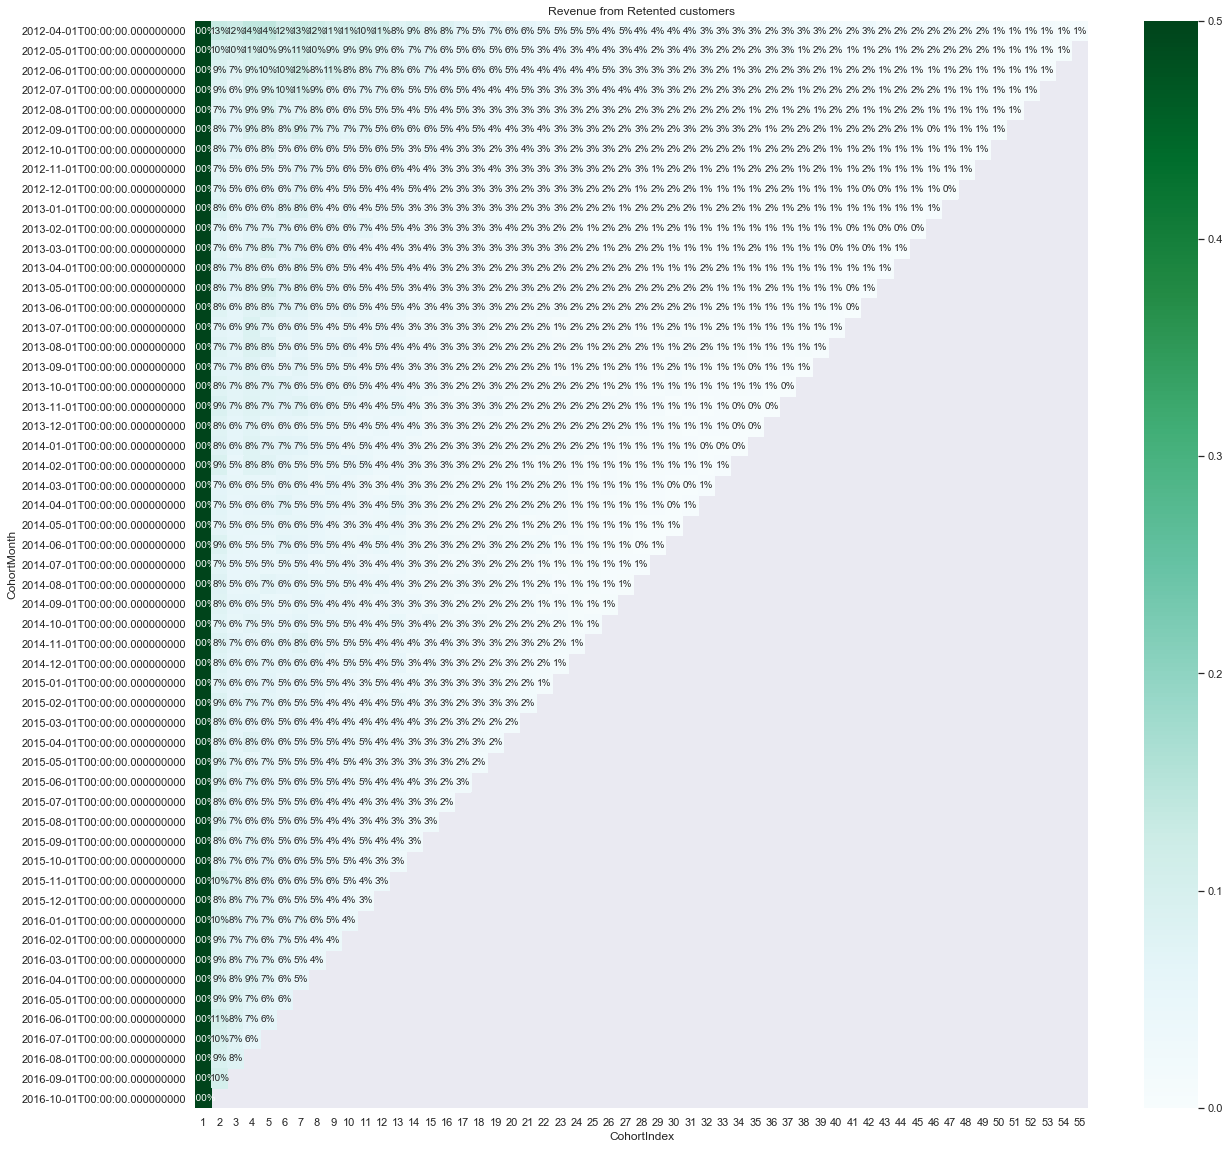

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.title('Revenue from Retented customers')
sns.heatmap(data = retention,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5,
cmap = 'BuGn')
plt.show()

In [ ]:
OSL Total

In [36]:
grouping = invoice.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['OSL Total'].sum()
cohort_data = cohort_data.reset_index()
OSL_quantity = cohort_data.pivot(index='CohortMonth',
columns='CohortIndex',
values='OSL Total')
OSL_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-01,438916.100,149622.800,105142.600,36593.000,65194.500,137851.200,79597.600,86594.300,61997.400,88904.500,114987.600,128948.500,30287.600,125201.600,160299.700,140762.100,77876.600,45383.900,45201.700,32742.800,41698.900,59408.300,59432.700,142887.400,64459.800,59005.100,85892.200,144944.800,164446.200,87438.200,96836.400,182588.900,19123.000,105270.600,66862.900,19930.100,96315.100,68200.200,160511.800,114861.200,159321.500,167838.700,81117.900,86069.700,71438.500,137811.900,144439.800,95681.900,130974.300,121759.000,89652.600,12509.800,91600.800,34749.000,5030.000
2012-05-01,455685.900,38307.700,53326.000,39862.000,55791.800,56856.400,55454.100,101148.400,100008.400,40721.000,75842.200,80223.000,17469.400,27452.000,15904.700,44355.600,66110.600,33849.800,27857.300,55069.800,25238.500,33722.200,60022.600,8800.200,96364.800,24985.600,30565.400,46152.800,29049.400,22814.000,15939.400,29444.500,23150.300,15288.100,42510.200,18985.400,48945.300,21634.500,22580.000,11114.600,8166.700,19274.900,31447.000,7210.200,18926.900,4630.300,14462.000,64352.300,77950.200,34754.900,399.900,0.000,2205.000,0.000,nan
2012-06-01,387364.000,79018.200,43967.200,34123.600,67636.700,95155.800,74730.700,62732.200,74791.500,40615.400,93444.400,81795.300,24327.600,28456.300,12532.600,44969.100,25586.600,78613.000,62238.600,39330.300,14928.900,14384.000,18591.000,24621.700,51832.600,34360.800,46120.200,21702.600,60882.300,27569.400,67174.500,30939.800,22100.500,1250.300,20127.500,19526.400,16262.200,46141.700,34973.200,11731.100,10714.300,23100.300,9605.900,34846.400,6961.000,73033.700,34028.400,49557.700,10221.600,20130.200,23903.000,0.000,9650.400,nan,nan
2012-07-01,471637.600,47781.000,63684.100,65003.700,127867.300,175157.500,52194.400,49781.800,21996.000,72641.000,52535.400,36451.100,28028.600,69765.500,11299.400,90621.700,47135.300,45520.000,31100.000,42706.800,29160.100,42997.800,26835.200,28536.400,41406.700,20910.800,26875.200,24778.800,36531.200,25384.900,23385.000,29460.000,10707.700,22359.800,21057.000,22836.800,76905.500,17406.300,8305.900,8805.300,16969.500,21231.400,5266.100,84851.600,32567.900,13461.700,47651.700,1949.000,999.100,6889.600,0.000,0.000,nan,nan,nan
2012-08-01,398421.400,34973.300,24094.600,11359.500,46083.000,36090.400,41880.000,33950.900,24653.300,44031.500,39546.600,13685.700,14119.900,39554.700,29020.900,10449.400,33516.800,45728.500,8604.200,25360.700,5642.100,58753.900,2176.900,11284.300,7635.000,74584.600,7705.800,5484.900,27465.500,9514.800,10750.300,63257.100,30802.500,19574.700,2490.000,26899.900,5585.000,50298.200,1479.900,990.000,19857.600,24181.000,9637.100,3160.600,8235.400,490.000,12400.000,12199.800,4100.000,0.000,5000.000,nan,nan,nan,nan
2012-09-01,324138.300,44439.800,31399.500,60406.700,20084.900,29937.200,22130.200,16049.400,30885.000,95574.600,43419.100,67972.800,50260.900,9017.800,46994.000,62533.200,25654.700,19984.400,62857.800,37954.700,16365.000,19781.100,56185.800,2606.200,54040.300,10914.100,28528.700,34744.800,12221.700,24075.000,8675.100,15479.900,63654.800,17338.200,9951.800,2090.200,32649.400,54847.300,32340.300,490.100,13879.800,5400.000,4570.300,11680.400,1487.100,0.000,4050.000,7320.100,0.000,0.000,nan,nan,nan,nan,nan
2012-10-01,542264.800,41719.800,53746.100,16018.600,23652.800,34262.200,47925.300,22114.500,39618.200,6199.500,26191.000,60354.200,19776.500,23904.400,29204.600,77415.900,7637.700,26488.900,15064.700,32834.600,25234.000,9309.800,46216.200,6320.000,5055.000,23739.800,13370.300,72329.700,10896.000,10531.000,31248.300,59018.900,55084.400,17315.300,4859.400,9279.700,12714.900,18454.600,31520.900,7800.000,2249.800,6354.300,5243.500,490.000,5734.300,0.000,2400.000,0.000,5170.100,nan,nan,nan,nan,nan,nan
2012-11-01,584804.300,33128.000,65270.500,